In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
sns.set(context="paper", font="monospace")

import sys
print(sys.version)

%matplotlib inline

3.6.1 |Anaconda 4.4.0 (64-bit)| (default, May 11 2017, 13:25:24) [MSC v.1900 64 bit (AMD64)]


In [2]:
#Dialogo direttamente con il databaas
import MySQLdb
db = MySQLdb.connect(host="localhost",    # your host, usually localhost
                     user="root",         # your username
                     passwd="",  # your password
                     db="densita_popolazione")

In [3]:
df = pd.read_sql('SELECT * FROM sniff', con=db)

In [5]:
pd.set_option('display.max_columns', None)
df.head()

,id,mac,mac_num,locally,pow,data,chan,seq,ht_cap,ht_ampdu,vht_cap,sup_rates,ext_sup_rates,mcs_1_7,mcs_8_15,mcs_16_23,mcs_24_31,mcs_32,mcs_33_38,mcs_39_52,mcs_53_76,ssid,uuid_e
0,2,78:25:ad:11:67:af,None,8,-86,2017-04-27 19:45:30,10,321,,,,"130,132,139,150,140,146,152,164","176,72,96,108",,,,,,,,,SAMSUNGSMART,
1,3,78:25:ad:11:67:af,None,8,-86,2017-04-27 19:45:31,10,347,,,,"130,132,139,150,140,146,152,164","176,72,96,108",,,,,,,,,SAMSUNGSMART,
2,4,18:4f:32:f2:e7:81,None,8,-77,2017-04-27 19:45:31,11,1187,0x0000182d,0x00000017,,"2,4,11,22","12,18,24,36,48,72,96,108","0x000000ff,0x000000f","0x000000ff,0x000000f","0x00000000,0x0000000","0x00000000,0x0000000","0x00000000,0x0000000","0x00000000,0x0000000","0x00000000,0x0000000","0x00000000,0x0000000",,
3,5,18:4f:32:f2:e7:81,None,8,-82,2017-04-27 19:45:31,11,1188,0x0000182d,0x00000017,,"2,4,11,22","12,18,24,36,48,72,96,108","0x000000ff,0x000000f","0x000000ff,0x000000f","0x00000000,0x0000000","0x00000000,0x0000000","0x00000000,0x0000000","0x00000000,0x0000000","0x00000000,0x0000000","0x00000000,0x0000000",,
4,6,78:25:ad:11:67:af,None,8,-88,2017-04-27 19:45:32,11,361,,,,"130,132,139,150,140,146,152,164","176,72,96,108",,,,,,,,,SAMSUNGSMART,


In [6]:
df_sort = df.sort_values(['mac','data'])

In [7]:
time_between_probes = []
for i in range(0, df_sort.shape[0]-1):
    if(df_sort['mac'][i] == df_sort['mac'][i+1]):
        time = df_sort['data'][i+1] -  df_sort['data'][i]
        time_between_probes.append(time.total_seconds())

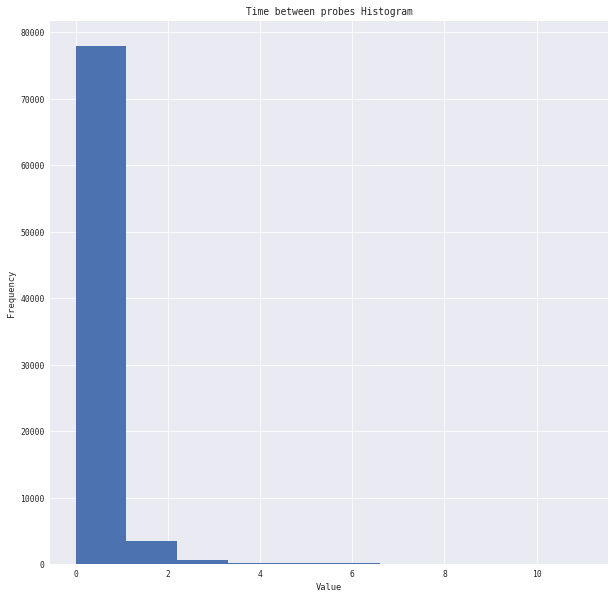

In [8]:
plt.figure(figsize=(10, 10))
plt.hist(time_between_probes)
plt.title("Time between probes Histogram")
plt.xlabel("Value")
plt.ylabel("Frequency")
fig = plt.gcf()
# Dal grafico possiamo notare come sia davvero difficile che due probe siamo inviati a distanza maggiore di 8 secondi
# Supponendo un intervallo di 10 secondi: "Se non mi arrivano più probe entro 10 secondi allora l'utente se ne è andato"
# otterremmo una previsione dell'uscita della persona aggiornata nel giro di 10 secondi dalla sua effettiva uscita

# /!\ Bisogna anche considerare la probabilità di assegnare una probe request in un determinato momento
# ad un cluster piuttosto che un altro, ciò significherebbe rimuovere l'utente che è stato assegnato male
# per maggiore stabilità sarebbe probabilmente meglio utilizzare tempi maggiori (es 8*3 = 24 sec -> devo assegnare in maniera 
# sbagliata 3 pacchetti prima di far sparire l'utente)

In [9]:
# NOTA: Non ha senso calcolare l'intervallo di confidenza di tale valore, per ottenere un valore massimo corretto in quanto
# le misurazioni che abbiamo non sono misurazioni di un singolo valore ma sono misure su più telefoni, ciascuno con un
# proprio valore diverso
# CREDO (o forse comunque si perde un po' il significato di intervallo di confidenza, non essendoci un solo valore "puro")

# qui di sotto il calcolo è riportato comunque
from scipy.stats import t
t.interval(0.95, 10, loc=1, scale=2)

(-3.4562777039298771, 5.4562777039298771)